In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load data
df=pd.read_csv('train.csv')
# basic info
print(f'data loaded! {df.shape}')
print(f'first 5 rows: {df.head(5)}')
print(f'last 5 rows: {df.tail(5)}')
print(f'Data info: {df.info()}')


data loaded! (9800, 18)
first 5 rows:    Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Co

In [4]:
# converting Date_time columns object to Date time formate
df['Order Date']=pd.to_datetime(df['Order Date'],dayfirst=True)
df['Ship Date']=pd.to_datetime(df['Ship Date'],dayfirst=True)
#Checking null values
is_null=df.isnull().sum() #/ len(df) * 100 for checking % wise
df['Postal Code'].value_counts().head() # to checking counts of postal code


Postal Code
10035.0    253
10024.0    225
10009.0    220
94122.0    195
10011.0    193
Name: count, dtype: int64

In [5]:
# basic analysis
# 1 total sales
total_sale=df['Sales'].sum()
print(total_sale)


2261536.7827000003


In [6]:
# 2 average mean
if 'Sales' in df.columns:
    avg_sale=df['Sales'].mean()
    print(avg_sale)

230.7690594591837


In [10]:
# top 5 Category
if 'Product Name' in df.columns:
    top_cat=df['Product Name'].value_counts().head(3)
    print(f'Top 3 category: {top_cat}')

Top 3 category: Product Name
Staple envelope      47
Staples              46
Easy-staple paper    44
Name: count, dtype: int64


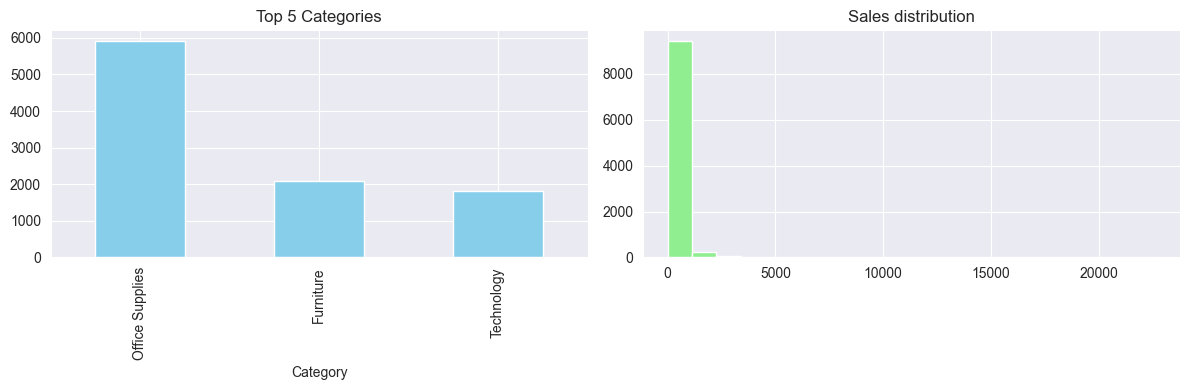

In [44]:
fig, axes=plt.subplots(1,2, figsize=(12,4))
# plot 1 for bar chart
if 'Category' in df.columns:
    df['Category'].value_counts().head(5).plot(kind='bar',ax=axes[0],color='skyblue')
    axes[0].set_title('Top 5 Categories')
# plot 2: for Histogram
if 'Sales' in df.columns:
    df['Sales'].hist(ax=axes[1], bins=20,color='lightgreen')
    axes[1].set_title('Sales distribution')

plt.tight_layout()
plt.savefig('sales_distribution.png')
plt.show()
